# Machine Learning - practice

Life Satisfaction & GDP

In [1]:
import numpy as np
import pandas as pd

In [2]:
life_sat = pd.read_csv('./data/BLI-feb22.csv', thousands=',')
life_sat.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [3]:
life_sat_total = life_sat[life_sat["INEQUALITY"]=="TOT"]

In [4]:
life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")

In [5]:
life_sat_total.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [6]:
GDP = pd.read_csv('./data/gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values="n/a", index_col="Country")
GDP.rename(columns={"2015": "GDP per capita"}, inplace=True)
GDP.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [7]:
# merge the two datasets
full = pd.merge(left=life_sat_total, right=GDP,
                left_index=True, right_index=True)

In [8]:
full.head(1)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,14.35,91.0,93.0,21.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0


In [9]:
full.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')

In [10]:
full.sort_values(by='GDP per capita', inplace=True)

In [11]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

ml

In [14]:
import sklearn.linear_model
import matplotlib.pyplot as plt

In [15]:
country_stats = full[['Life satisfaction', 'GDP per capita']]
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

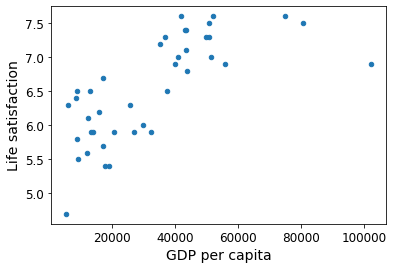

In [16]:
# viz
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [17]:
# linear model selection
model = sklearn.linear_model.LinearRegression()

In [18]:
# train
model.fit(X, y)

LinearRegression()

In [21]:
# prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP
print(model.predict(X_new))

[[6.28176479]]


In [22]:
# model k-Nearest Neighbors
import sklearn.neighbors

In [23]:
# 3-nearest neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [24]:
model1.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# prediction for Cyprus
print(model1.predict(X_new))

[[5.86666667]]


Italy

In [26]:
country_stats[['Life satisfaction', 'GDP per capita']].loc['Italy']

Life satisfaction        6.000
GDP per capita       29866.581
Name: Italy, dtype: float64

In [34]:
country_stats[['Life satisfaction', 'GDP per capita']].loc['France']

Life satisfaction        6.500
GDP per capita       37675.006
Name: France, dtype: float64

In [30]:
country_stats[['Life satisfaction', 'GDP per capita']].loc['United States']

Life satisfaction        6.900
GDP per capita       55805.204
Name: United States, dtype: float64

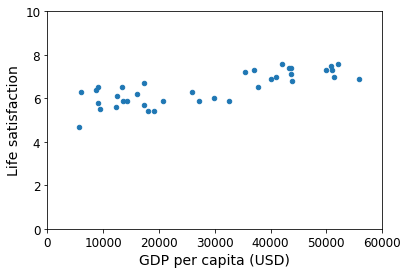

In [41]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
position_text = {
    'Italy': (30000, 1.5),
    'France': (37000, 2.5),
    'United States': (55000, 3.5),
}

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = country_stats.loc[country]
    country = "US" if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
        arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
# save_fig('/figures/money_happy_scatterplot')
plt.show()